# Aim:
#### To perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters and To draw the inferences from the clusters obtained.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df=pd.read_excel(r'C:\Users\ADMIN\Desktop\Data Science\Assignment_7\EastWestAirlines.xlsx',sheet_name='data')
df.drop(columns='ID#',inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [8]:
sc= StandardScaler()
x=sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

## Hierarchical Clustering

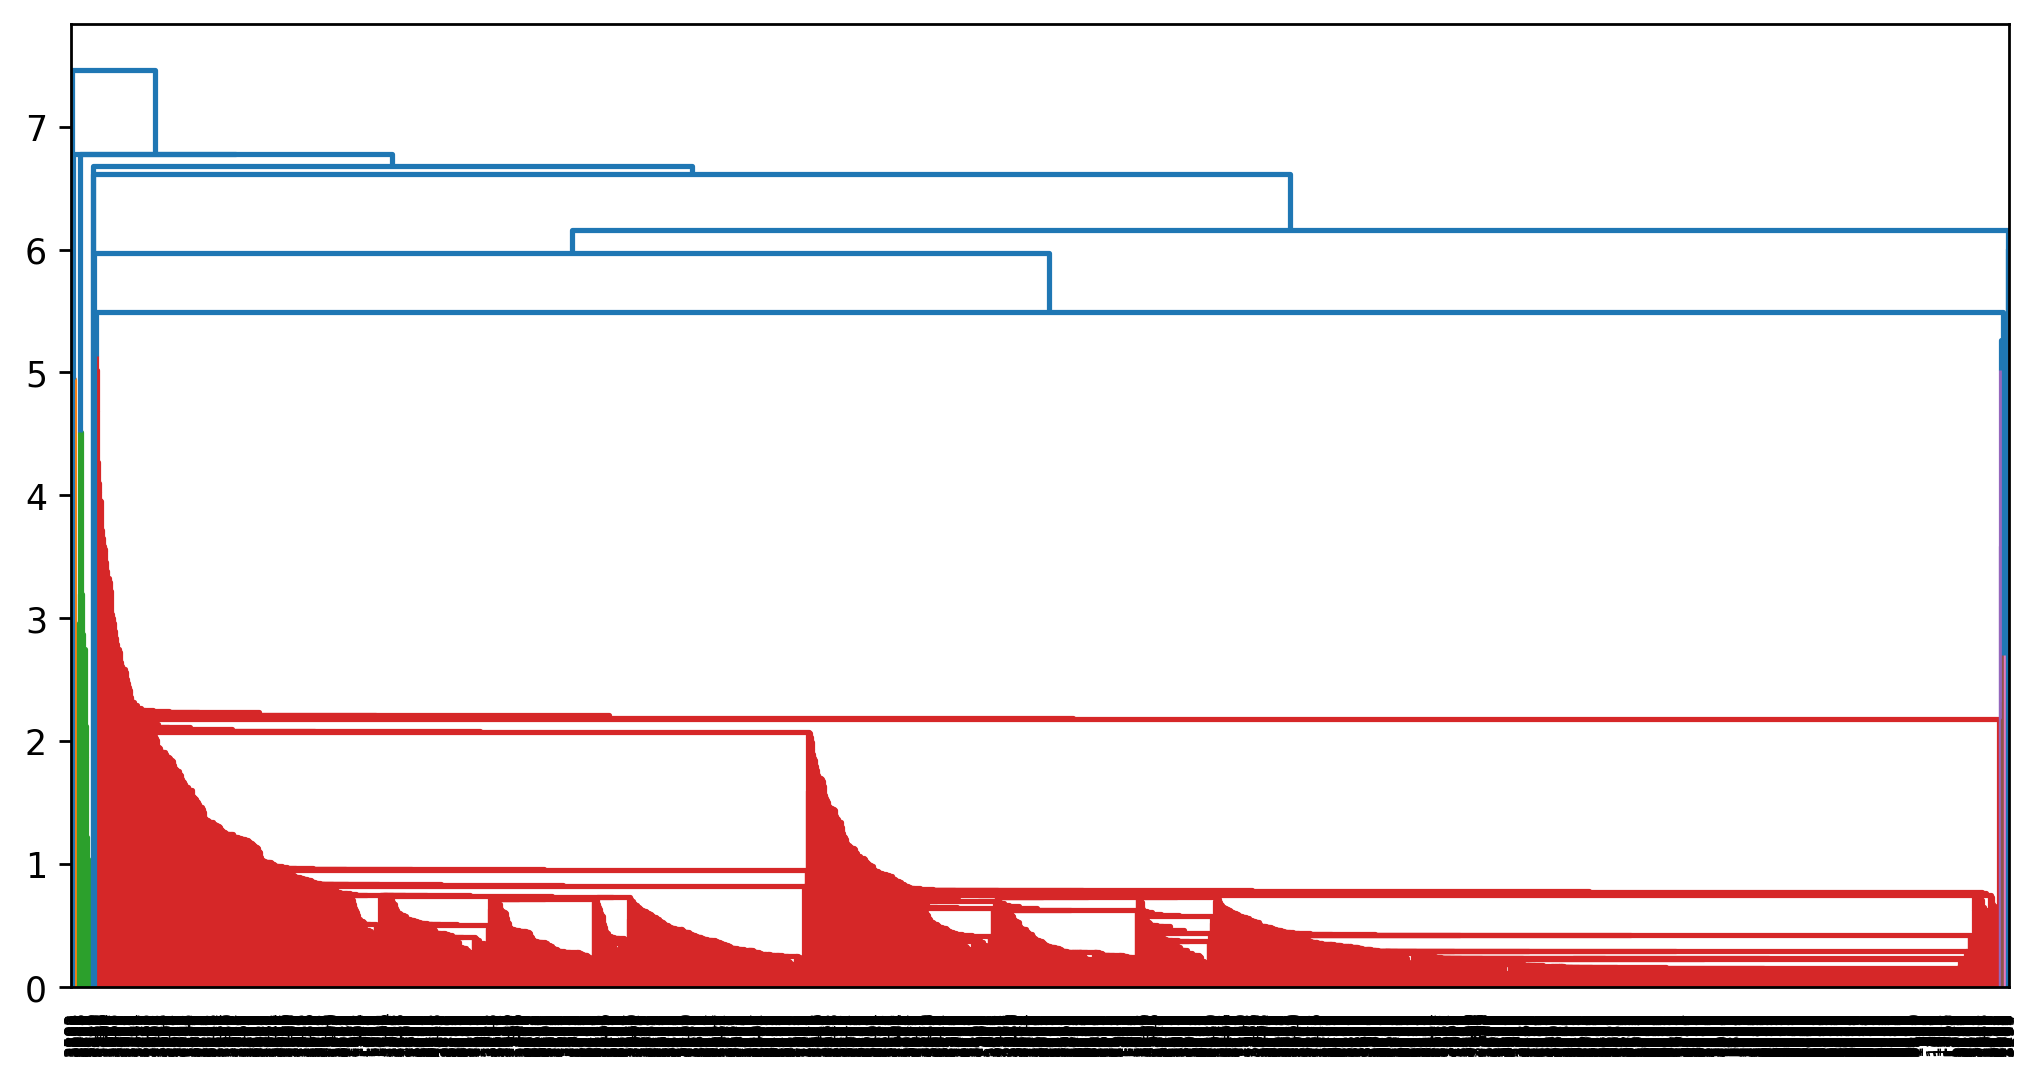

In [10]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x)
dendo = hierarchy.dendrogram(lk)

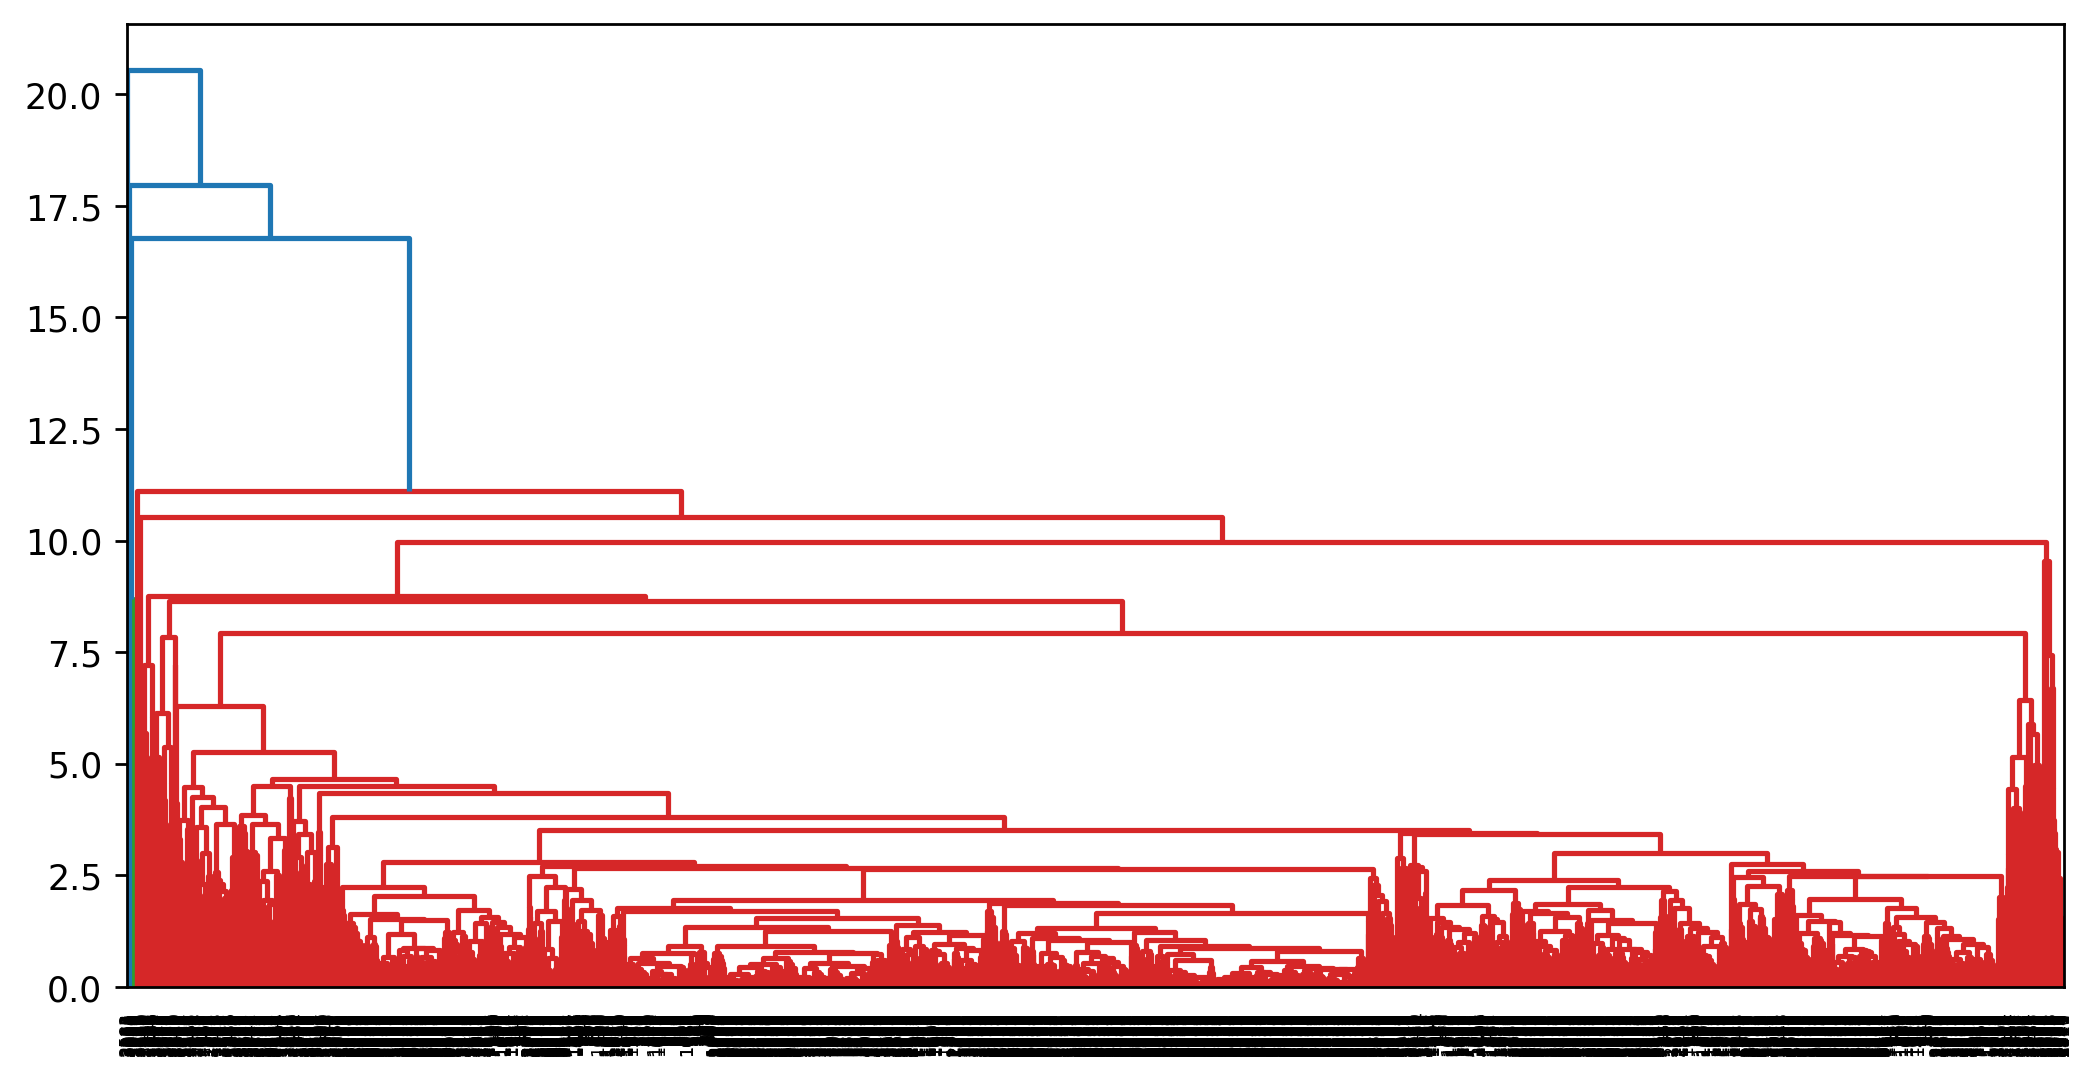

In [11]:
lk = hierarchy.linkage(x, method='average')
dendo = hierarchy.dendrogram(lk)

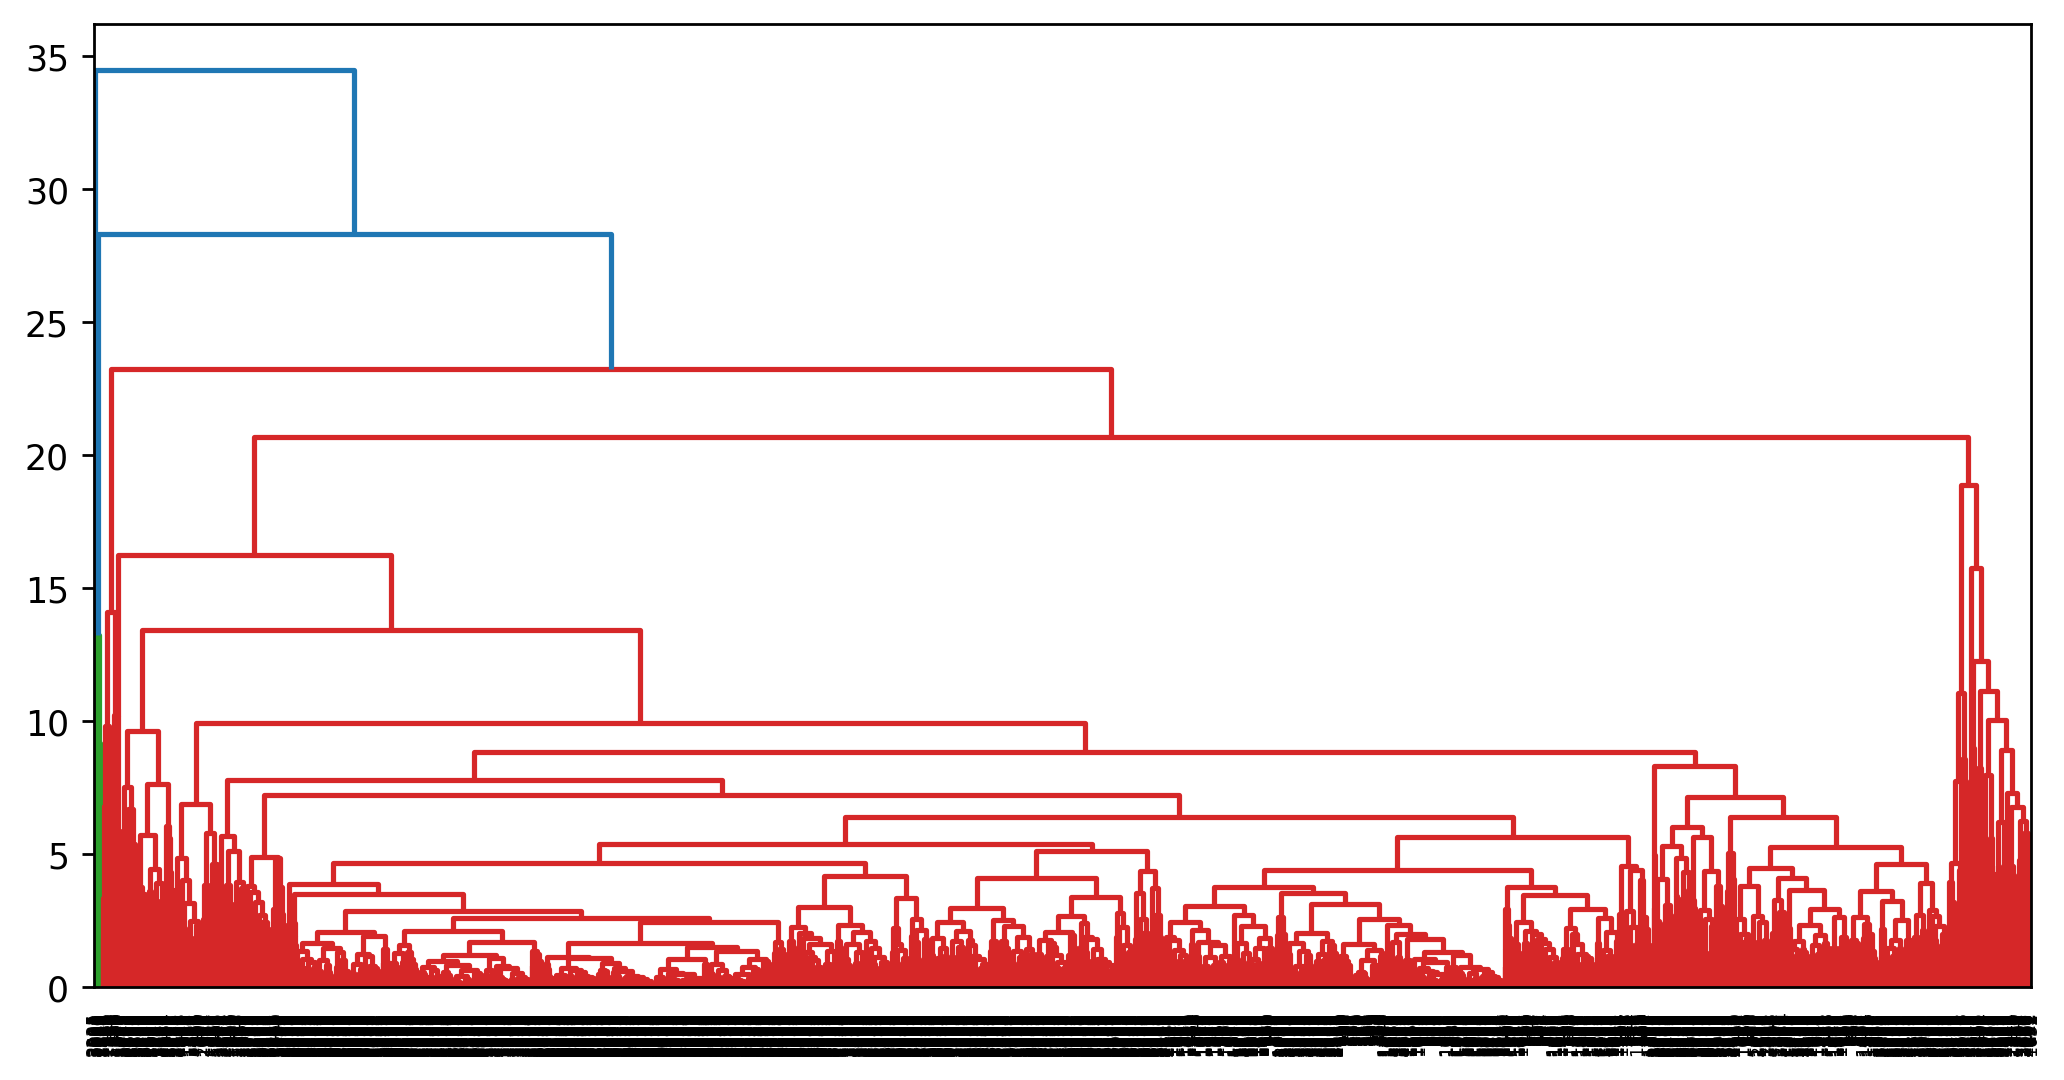

In [12]:
lk = hierarchy.linkage(x, method='complete')
dendo = hierarchy.dendrogram(lk)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc= AgglomerativeClustering(n_clusters=11)
y= hc.fit_predict(x)
y

array([9, 9, 9, ..., 7, 6, 6], dtype=int64)

In [16]:
df['Clusters']=y
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Clusters  
0          0         9  
1          0         9  
2          0         9  
3          0         9  
4          1         7  
...      ...       ...  
3994       1         1  
3995       1         1  
3996       1         7  
3997       0         6  
3998       0         6  

[3999 rows x 12 columns]

In [17]:
df['Clusters'].value_counts()

6     1207
9      669
7      622
1      570
10     393
5      196
2      130
0      130
3       43
8       21
4       18
Name: Clusters, dtype: int64

In [18]:
df.groupby('Clusters').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Clusters                                                                
0         134880.892308   393.323077   2.430769   1.000000   1.000000   
1          78819.310526    17.821053   1.078947   1.000000   1.000000   
2         110219.330769  3502.323077   1.861538   1.000000   1.000000   
3          68876.581395    23.255814   1.139535   2.348837   1.000000   
4         129951.388889    65.666667   3.388889   1.000000   3.722222   
5         174500.219388    20.142857   4.719388   1.000000   1.000000   
6          34564.370340     9.466446   1.277548   1.000000   1.000000   
7          63637.593248    38.881029   3.255627   1.000000   1.000000   
8         880404.190476   510.952381   3.333333   1.000000   1.000000   
9          39873.476831     0.747384   1.324365   1.000000   1.000000   
10        131229.491094    17.180662   3.829517   1.000000   1.000000   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Clusters                                                                  
0         36582.169231    29.338462        5915.523077        16.638462   
1          5847.610526     6.956140         680.970175         2.070175   
2         17226.661538    11.092308         727.153846         2.269231   
3         14689.837209    17.534884         582.627907         2.209302   
4         86259.888889    26.222222         422.222222         1.333333   
5         75151.122449    22.142857         545.076531         1.780612   
6          4515.278376     6.002486          68.813587         0.242751   
7         27698.287781    17.643087         312.779743         0.906752   
8         62619.285714    19.333333        1316.333333         5.380952   
9          4670.140508     8.499253          81.047833         0.261584   
10        36138.391858    18.569975         226.725191         0.615776   

          Days_since_enroll    Award?  
Clusters                               
0               4599.607692  0.753846  
1               4520.301754  0.791228  
2               4161.053846  0.600000  
3               3968.930233  0.395349  
4               4488.777778  0.500000  
5               5544.984694  0.954082  
6               2353.636288  0.000000  
7               4345.491961  1.000000  
8               6705.619048  0.904762  
9               5683.690583  0.000000  
10              4909.516539  0.000000

In [19]:
df[df['Clusters']==2]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
21     185681        2024          1          1          1        13300   
70      84409        5031          2          1          1        15436   
177     28086        1745          2          1          1         7368   
193     52738        2398          1          1          1            0   
207     23184        1250          1          1          1         3694   
...       ...         ...        ...        ...        ...          ...   
3701     8964        3861          1          1          1            0   
3747     6015        4929          1          1          1            0   
3811    15832        2376          1          1          1         8130   
3897   179832        2954          3          1          1        18218   
3953    59927         739          1          1          1         3100   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
21             16               1800                9               6896   
70             16               1150                4               7766   
177            12                  0                0               7549   
193             0                  0                0               7498   
207            12               1150                3               7467   
...           ...                ...              ...                ...   
3701            0                  0                0                594   
3747            0                  0                0                 30   
3811           20                500                1               1698   
3897           20               2500                5               1569   
3953            3                  0                0               1464   

      Award?  Clusters  
21         1         2  
70         0         2  
177        1         2  
193        0         2  
207        1         2  
...      ...       ...  
3701       0         2  
3747       0         2  
3811       1         2  
3897       1         2  
3953       1         2  

[130 rows x 12 columns]

# KMeans

In [21]:
df.drop(columns='Clusters',inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [22]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [24]:
from sklearn.cluster import KMeans
km= KMeans()
y1=km.fit_predict(x)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
x1=pd.DataFrame(x)
x1['Cluster']=y1
x1

0         1         2         3         4         5         6  \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

             7         8         9        10  Cluster  
0    -0.328603 -0.362168  1.395454 -0.766919        0  
1    -0.328603 -0.362168  1.379957 -0.766919        0  
2    -0.328603 -0.362168  1.411920 -0.766919        0  
3    -0.328603 -0.362168  1.372208 -0.766919        0  
4     1.154932  0.692490  1.363975  1.303918        6  
...        ...       ...       ...       ...      ...  
3994 -0.185750 -0.098503 -1.315120  1.303918        1  
3995 -0.328603 -0.362168 -1.318994  1.303918        1  
3996 -0.328603 -0.362168 -1.315604  1.303918        1  
3997  0.028531 -0.098503 -1.316088 -0.766919        3  
3998 -0.328603 -0.362168 -1.317541 -0.766919        3  

[3999 rows x 12 columns]

In [27]:
z=km.cluster_centers_
z

array([[-1.38166662e-01, -1.43673888e-01, -4.04152428e-01,
        -9.82418871e-02, -5.74747188e-02, -4.49083344e-01,
        -3.21305532e-01, -2.02775449e-01, -2.21619417e-01,
         7.39387286e-01, -7.66919299e-01],
       [-1.53151141e-01, -5.83664081e-02, -2.64720468e-01,
        -9.82418871e-02, -6.27665798e-02, -2.71672161e-01,
        -1.03564877e-01, -2.74580340e-02, -2.07060165e-02,
         6.58849698e-02,  1.30391816e+00],
       [ 4.25464160e-01,  7.09987688e+00,  9.59681956e-03,
        -9.82418871e-02, -6.27665798e-02,  1.10131291e-01,
         9.82601731e-02,  3.59263109e-01,  4.00062342e-01,
        -8.13235276e-02,  3.24976816e-01],
       [-3.87747567e-01, -1.44381977e-01, -5.88302430e-01,
        -9.82418871e-02, -6.27665798e-02, -5.28406328e-01,
        -5.21657798e-01, -2.21780939e-01, -2.43903244e-01,
        -9.74388036e-01, -7.66919299e-01],
       [ 1.24463396e+00,  4.86198029e-01,  2.36594659e-01,
        -9.82418871e-02, -6.27665798e-02,  8.04931022e-01,
  

### Elbow Curve

In [35]:
wcss=[]
for i in range(1,40):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
  


In [36]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.271221785566,
 27153.75222832097,
 23706.694307996433,
 21092.0519398517,
 18893.594348298007,
 17316.78205595397,
 15961.389778640128,
 14729.738063593482,
 13705.196232001734,
 12947.670149951793,
 12429.591680064805,
 11975.177582641452,
 11454.828407403269,
 11113.283102549316,
 10746.7673230024,
 10362.108896689919,
 10167.50960782617,
 9853.037559607204,
 9570.0802877195,
 9196.906369085595,
 9075.419297738474,
 8790.855076734346,
 8579.101703393742,
 8395.606924884969,
 8263.261976553978,
 8086.927627299383,
 7873.359009875014,
 7746.532837511221,
 7672.643342277379,
 7540.103954678705,
 7400.161658476651,
 7289.367897281923,
 7163.899599651439,
 7168.278637918105,
 7017.284109595018,
 6926.4965866223,
 6777.523050430984]

Text(0, 0.5, 'WCSS')

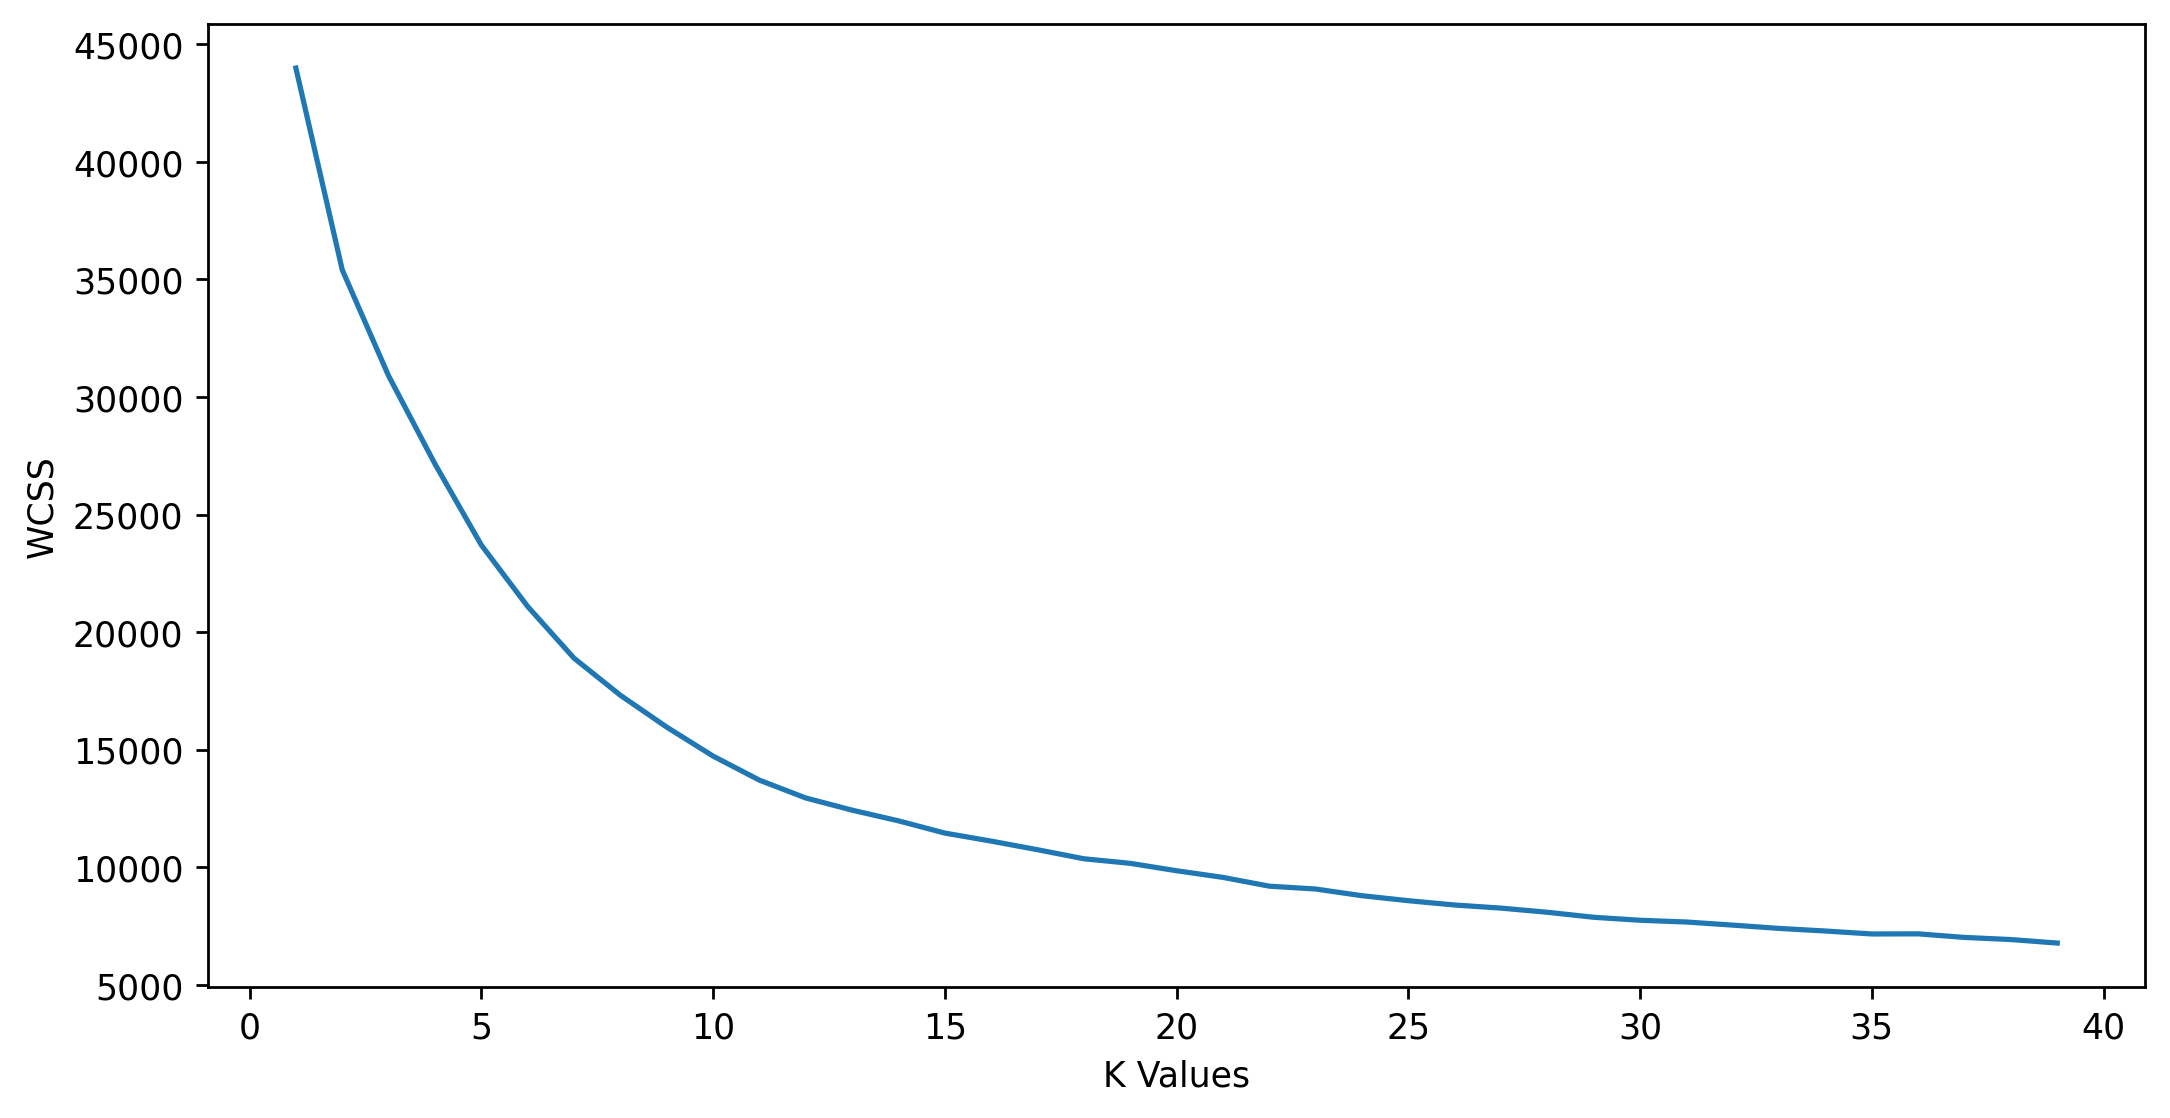

In [38]:
plt.plot(range(1,40),wcss)
plt.xlabel("K Values")
plt.ylabel("WCSS")

In [41]:
km = KMeans(n_clusters=12)
y2 = km.fit_predict(x)
y2

array([ 9,  9,  9, ...,  6, 10, 10])

In [42]:
x2 = pd.DataFrame(x)
x2['Clusters'] = y2
x2

0         1         2         3         4         5         6  \
0    -0.451141 -0.186299 -0.769578 -0.098242 -0.062767 -0.702786 -1.104065   
1    -0.539457 -0.186299 -0.769578 -0.098242 -0.062767 -0.701088 -0.999926   
2    -0.320031 -0.186299 -0.769578 -0.098242 -0.062767 -0.539253 -0.791649   
3    -0.583799 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
4     0.239678 -0.186299  1.409471 -0.098242 -0.062767  1.083121  1.499394   
...        ...       ...       ...       ...       ...       ...       ...   
3994 -0.547079 -0.186299 -0.769578 -0.098242 -0.062767 -0.356960 -0.791649   
3995 -0.091465 -0.186299 -0.769578 -0.098242 -0.062767 -0.669367 -0.687511   
3996 -0.000043 -0.186299  0.683121 -0.098242 -0.062767  0.343804 -0.375096   
3997 -0.185607 -0.186299 -0.769578 -0.098242 -0.062767 -0.689286 -1.104065   
3998 -0.700508 -0.186299 -0.769578 -0.098242 -0.062767 -0.709992 -1.208203   

             7         8         9        10  Clusters  
0    -0.328603 -0.362168  1.395454 -0.766919         9  
1    -0.328603 -0.362168  1.379957 -0.766919         9  
2    -0.328603 -0.362168  1.411920 -0.766919         9  
3    -0.328603 -0.362168  1.372208 -0.766919         9  
4     1.154932  0.692490  1.363975  1.303918         3  
...        ...       ...       ...       ...       ...  
3994 -0.185750 -0.098503 -1.315120  1.303918         0  
3995 -0.328603 -0.362168 -1.318994  1.303918         0  
3996 -0.328603 -0.362168 -1.315604  1.303918         6  
3997  0.028531 -0.098503 -1.316088 -0.766919        10  
3998 -0.328603 -0.362168 -1.317541 -0.766919        10  

[3999 rows x 12 columns]

In [43]:
z2 = km.cluster_centers_
z2

array([[-1.62842464e-01, -4.48946337e-02, -6.61549866e-01,
        -9.82418871e-02, -6.27665798e-02, -4.50352100e-01,
        -4.56409521e-01, -1.00767039e-01, -9.12796451e-02,
         7.99260845e-02,  1.30391816e+00],
       [ 5.97525570e+00,  1.94907936e-01,  1.18349546e+00,
        -9.82418871e-02, -6.27665798e-02,  2.01922556e+00,
         1.04349987e+00,  7.57068718e-01,  1.04990222e+00,
         1.13076267e+00,  9.81787888e-01],
       [ 3.04027052e-01, -1.61589222e-01,  9.14396720e-01,
        -9.82418871e-02, -5.42715193e-02,  3.98182684e-01,
         5.85809189e-01, -2.14714774e-01, -2.45858140e-01,
         1.16062419e-01, -7.66919299e-01],
       [ 7.72909347e-01, -5.03268521e-02,  2.00568307e+00,
        -9.82418871e-02, -4.14227403e-02,  2.41855590e+00,
         1.21474962e+00,  6.44675274e-02,  1.12428300e-01,
         6.97240604e-01,  9.93292541e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
  

In [44]:
df['Y'] = y2
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?   Y  
0          0   9  
1          0   9  
2          0   9  
3          0   9  
4          1   3  
...      ...  ..  
3994       1   0  
3995       1   0  
3996       1   6  
3997       0  10  
3998       0  10  

[3999 rows x 12 columns]

In [46]:
df.groupby('Y').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
Y                                                                               
0    57192.821918   109.385519   1.148728   1.000000   1.000000   6269.767123   
1   675686.400000   294.888889   3.688889   1.000000   1.000000  65905.000000   
2   104236.024876    19.114428   3.318408   1.000000   1.001658  26760.140962   
3   151482.041667   105.183333   4.820833   1.000000   1.004167  75548.008333   
4   138061.400000    78.800000   3.466667   1.000000   4.066667  93927.866667   
5   164734.027027   677.567568   2.459459   1.000000   1.000000  43079.270270   
6    64106.746212    61.827652   3.441288   1.000000   1.000000  29058.020833   
7    68876.581395    23.255814   1.139535   2.348837   1.000000  14689.837209   
8   116472.400000  5636.345455   2.072727   1.000000   1.000000  19804.290909   
9    47252.324427    33.062341   1.096692   1.000000   1.001272   2911.679389   
10   30866.488253    38.108274   1.086823   1.000000   1.000000   2869.818182   
11  106684.968153   236.859873   1.757962   1.000000   1.000000  18855.159236   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Y                                                                        
0      7.219178         318.978474         1.027397        4283.596869   
1     21.622222        1519.977778         5.355556        6453.444444   
2     17.227197         159.447761         0.441128        4358.213930   
3     23.266667         550.312500         1.800000        5558.275000   
4     28.066667         506.666667         1.600000        4613.866667   
5     38.405405       10088.243243        26.351351        4191.297297   
6     17.577652         234.882576         0.681818        4501.706439   
7     17.534884         582.627907         2.209302        3968.930233   
8     12.545455         963.036364         2.890909        3950.636364   
9      5.814249         149.292621         0.469466        5645.318066   
10     5.563841         105.217569         0.358529        1987.859040   
11    20.242038        3674.452229        10.802548        4180.490446   

      Award?  
Y             
0   1.000000  
1   0.844444  
2   0.000000  
3   0.850000  
4   0.533333  
5   0.945946  
6   1.000000  
7   0.395349  
8   0.527273  
9   0.000000  
10  0.000000  
11  0.707006

In [48]:
df[df['Y']==3]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
11      96522           0          5          1          1        61105   
20     120576           0          5          1          1        58831   
35     123759           0          4          1          1        50572   
52     118531           0          4          1          1        44577   
...       ...         ...        ...        ...        ...          ...   
3346   116923           0          5          1          1        70403   
3501   177785           0          5          1          1        77203   
3753    70178           0          5          1          1        61530   
3855   190730           0          5          1          1        78916   
3883   126167           0          5          1          1       190160   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26               2077                4               6935   
11             19                  0                0               6924   
20             23                250                2               6896   
35             23               2500                5               7865   
52             38                  0                0               6868   
...           ...                ...              ...                ...   
3346           50                  0                0               1738   
3501           15                  0                0               1251   
3753           12               1300                6               3306   
3855           28               2450                9               1648   
3883           15                  0                0               1612   

      Award?  Y  
4          1  3  
11         1  3  
20         1  3  
35         1  3  
52         1  3  
...      ... ..  
3346       0  3  
3501       1  3  
3753       1  3  
3855       1  3  
3883       1  3  

[240 rows x 12 columns]

# DBSCAN

In [49]:
df.drop(columns='Y',inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [50]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

<Axes: >

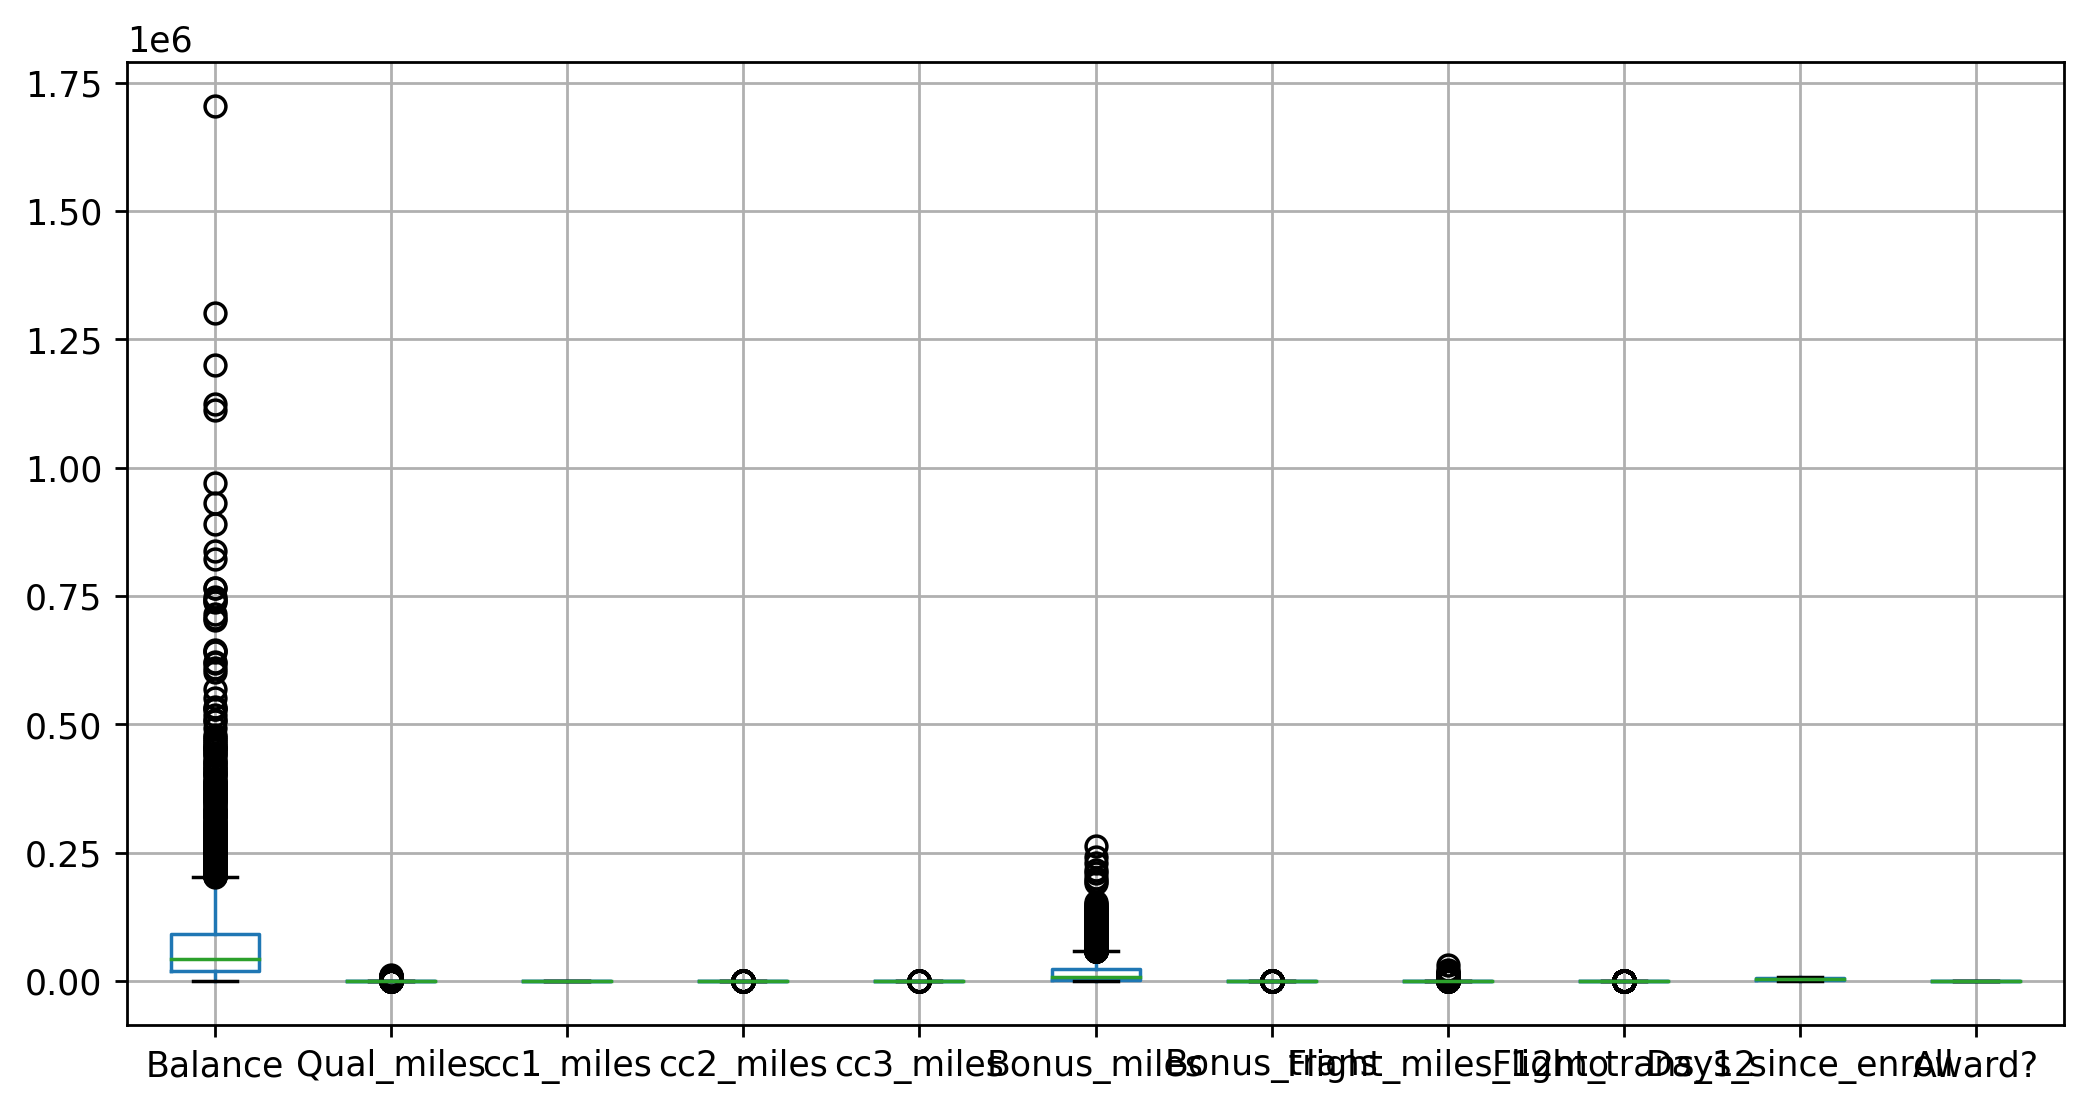

In [51]:
df.boxplot()

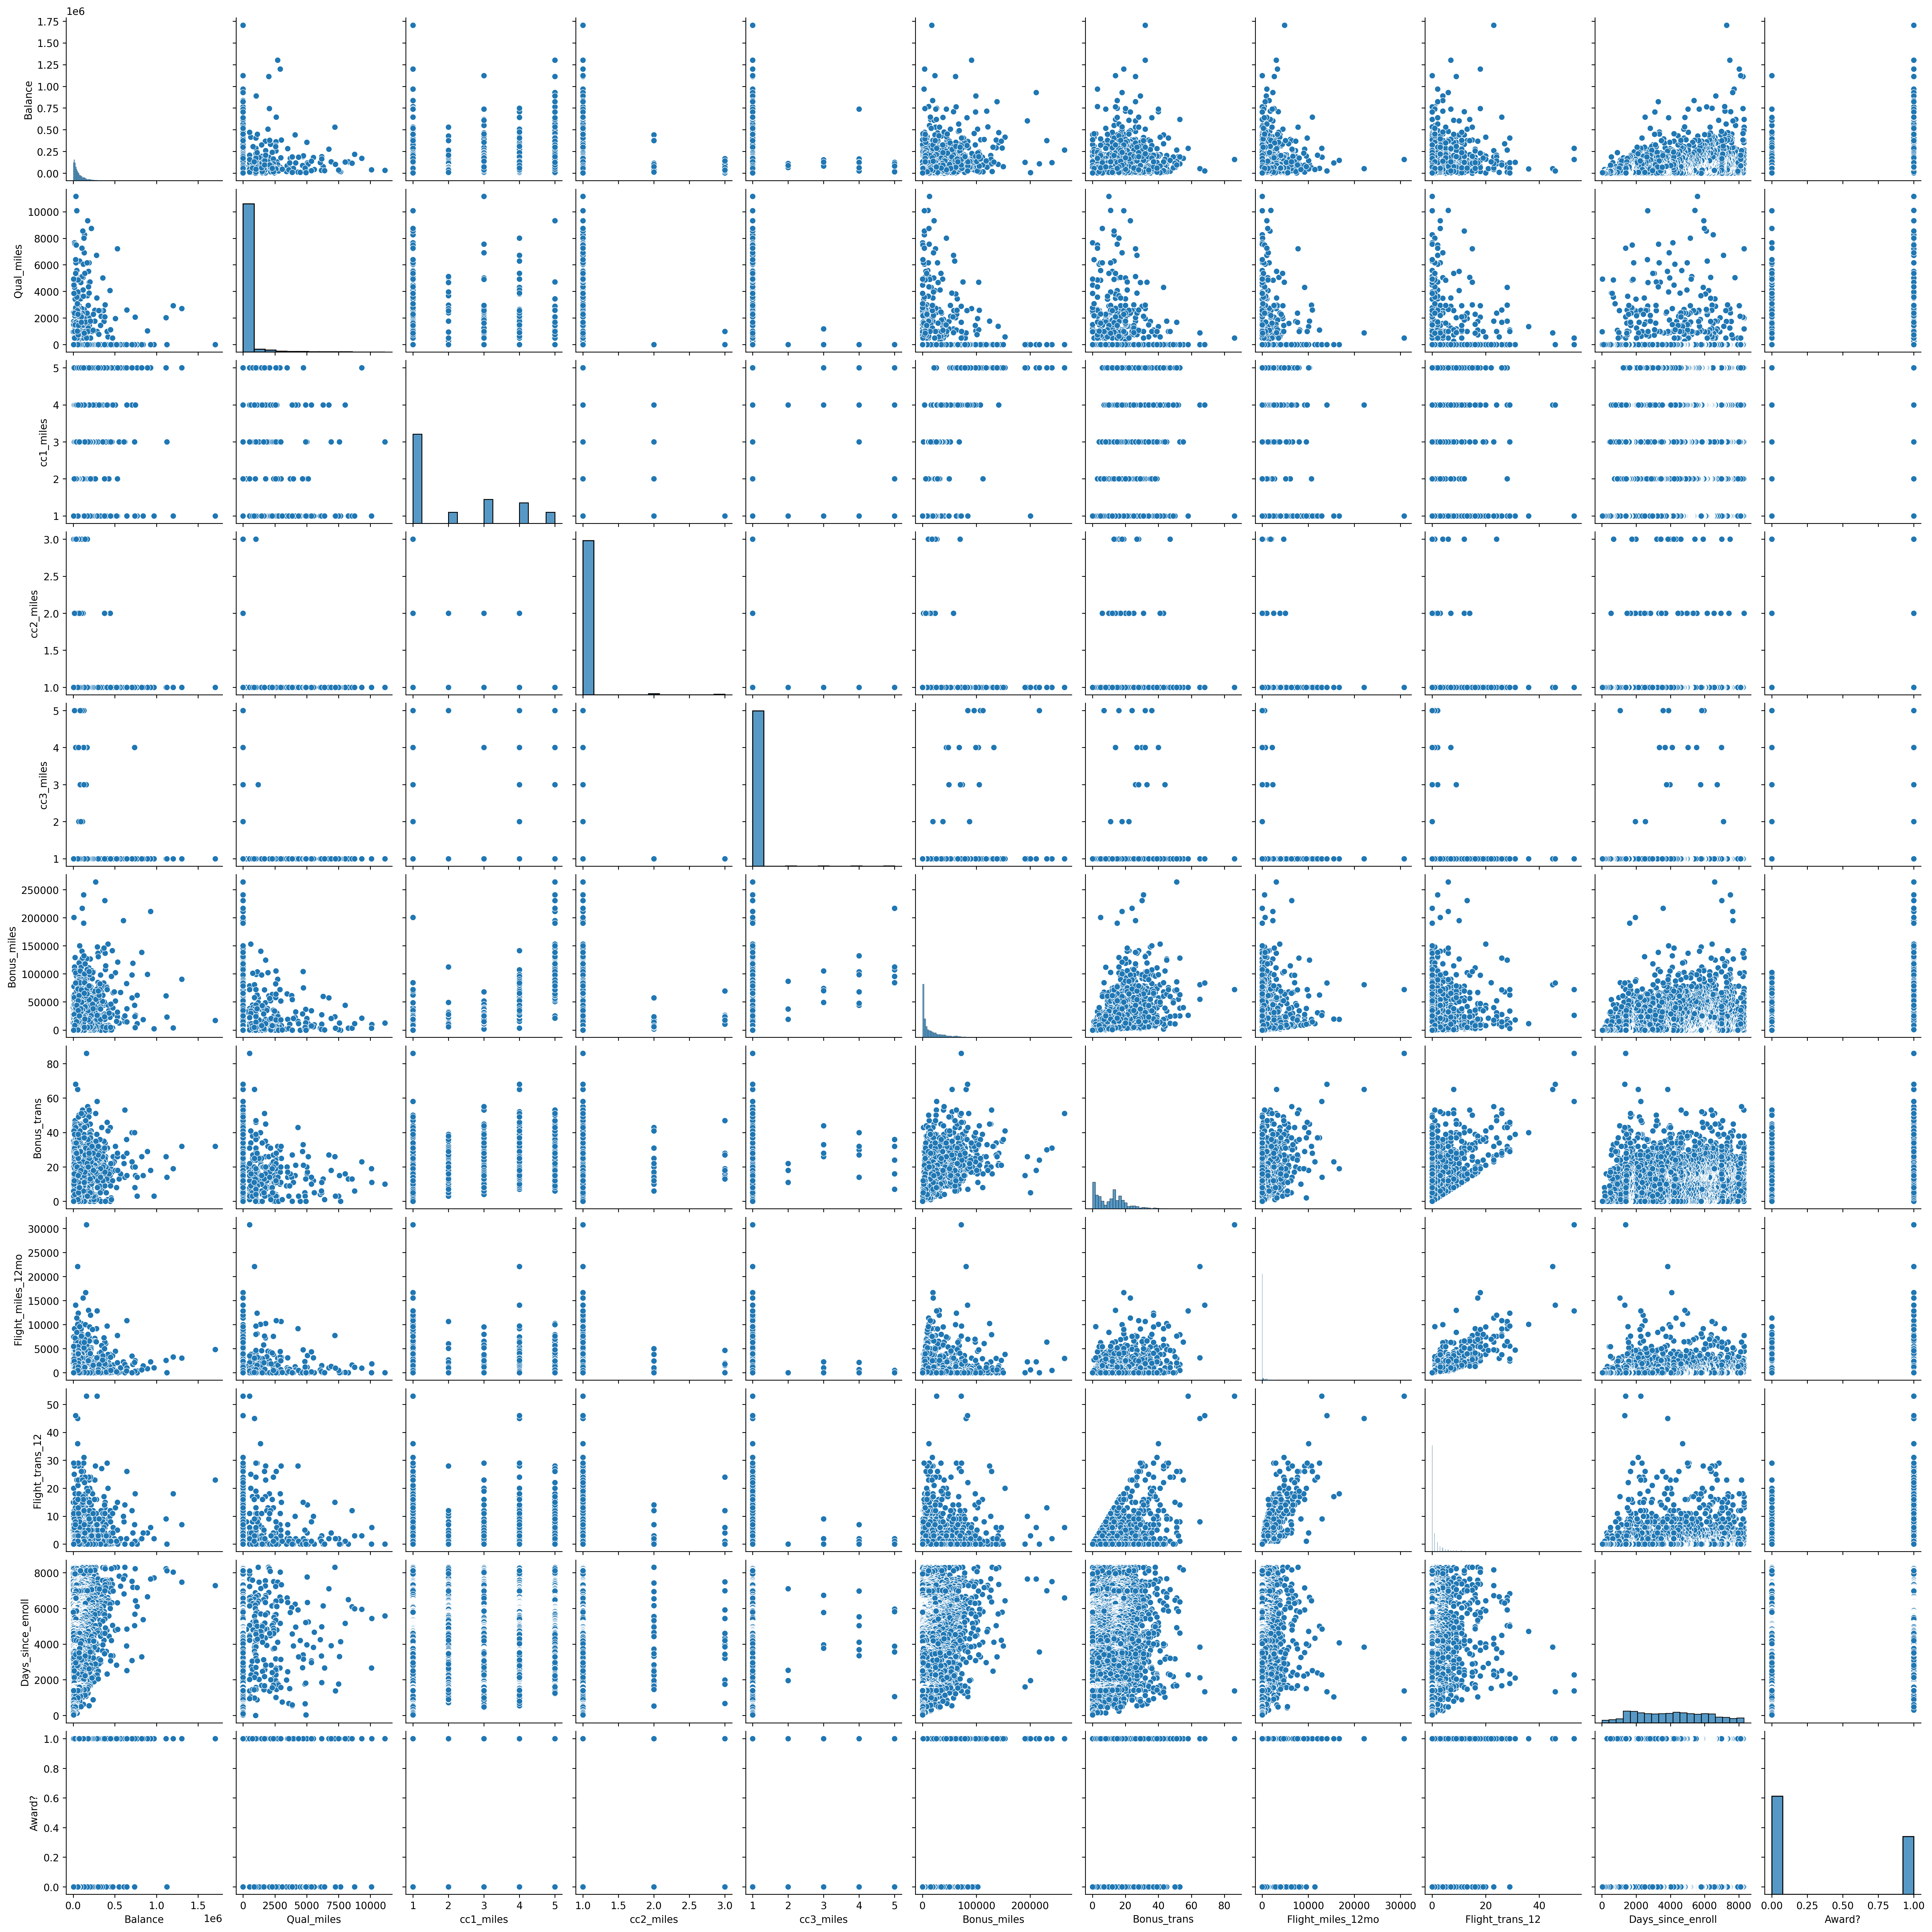

In [52]:
sns.pairplot(df)

In [54]:
from sklearn.cluster import DBSCAN
db=DBSCAN()

y3=db.fit_predict(x)
y3

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y3)

-0.07834757831741164

In [56]:
db = DBSCAN(eps=6, min_samples=10)

y3 = db.fit_predict(x)
y3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
silhouette_score(x,y3)

0.5461423540094525

In [99]:
db = DBSCAN(eps=8, min_samples=10)

y3 = db.fit_predict(x)
y3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
silhouette_score(x,y3)

0.8562820070415407

In [101]:
df['Y']=y3
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  Y  
0          0  0  
1          0  0  
2          0  0  
3          0  0  
4          1  0  
...      ... ..  
3994       1  0  
3995       1  0  
3996       1  0  
3997       0  0  
3998       0  0  

[3999 rows x 12 columns]

In [102]:
df['Y'].value_counts()

 0    3998
-1       1
Name: Y, dtype: int64

In [103]:
df[df['Y']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3583   160114         500          1          1          1        71954   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3583           86              30817               53               1373   

      Award?  Y  
3583       1 -1